In [1]:
# import cv2 
from __future__ import print_function
import numpy as np 
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import matplotlib.image as mpimg

In [2]:
# Origin gif 
# paths = sorted(os.listdir("data/imgs"))[1:]
# paths = [os.path.join("data/imgs",path) for path in paths]
# paths = [ Image.open(i) for i in paths]
# imageio.mimsave("origin.gif", paths, fps=10)

In [3]:
# MAX_FEATURES = 5000
# GOOD_MATCH_PERCENT = 0.2

def alignImages(im1, im2):
    
    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    #orb = cv2.AKAZE_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    
  
    goodmatches = matches
    #matches = matches[:numGoodMatches]
    matches = [x for x in matches if x.distance <DISTANCE_THRESH]
    # Draw top matches

    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
#     cv2.imwrite("matches.jpg", imMatches)
    
    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography

    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
    
    return h
#     print(h)
#     height, width, channels = im2.shape

#     im1Reg = cv2.warpPerspective(im1, h, (width, height))
    
#     return im1Reg, h



  

In [4]:
path = "data"
f_bg = os.path.join(path, "blackboard.jpg")
f = os.path.join(path, "imgs/학원 전자칠판으로 수학문제 풀이 이제는 스마트하게! 대전 건쌤수학교습소 빔프로젝터 전자칠판 설치_151.jpg")
###### root --
###########날짜--
###############--images.jpg

In [5]:
MAX_FEATURES = 5000
GOOD_MATCH_PERCENT = 0.1
DISTANCE_THRESH = 45
k=2
res = 4





im_bg = cv2.imread(f_bg, cv2.IMREAD_COLOR)
im_bg=cv2.resize(im_bg,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
# im_bg = cv2.cvtColor(im_bg, cv2.COLOR_BGR2RGB)

im = cv2.imread(f, cv2.IMREAD_COLOR)
im=cv2.resize(im,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# al_image,h_im=alignImages(im, im2)
# cv2.imwrite('result.jpg',al_image)


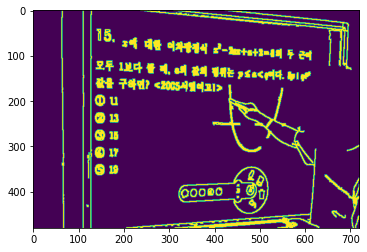

In [6]:
edge = cv2.Canny(im,50,150)

kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/25

dst = cv2.filter2D(edge, -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성
dst = dst>0
dst= dst*255

plt.imshow(dst)
# 

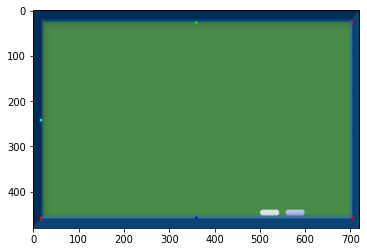

In [7]:
import copy
new_img = copy.deepcopy(im_bg)
for i in range(5):
    for j in range(5):
#         new_img[25+i, 15+j] = [255,0,0]
        new_img[25+i, 700+j] = [255,0,0]
        new_img[455+i, 15+j] = [255,0,0]
        new_img[455+i, 700+j] = [255,0,0]
        
        new_img[25+i, 357+j] = [0,255,0]
        new_img[455+i, 357+j] = [0,0,255]
        new_img[240+i, 15+j] = [0,255,255]
#         new_img[240+i, 700+j] = [255,0,255]
    
plt.imshow(new_img)

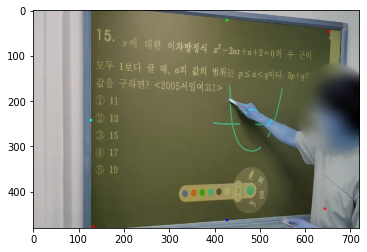

In [8]:
import copy
new_img = copy.deepcopy(im)
for i in range(5):
    for j in range(5):
        #new_img[25+i, 15+j] = [255,0,0]
        new_img[45+i, 650+j] = [255,0,0]
        new_img[474+i, 130+j] = [255,0,0]
        new_img[435+i, 640+j] = [255,0,0]
        
        new_img[20+i, 425+j] = [0,255,0]
        new_img[460+i, 425+j] = [0,0,255]
        new_img[240+i, 125+j] = [0,255,255]
#         new_img[240+i, 700+j] = [255,0,255]
    
plt.imshow(new_img)

[[ 9.60396711e-01  2.78856935e-02 -1.12283152e+02]
 [-1.00580957e-01  8.06091354e-01  5.14005055e+01]
 [-4.09062978e-04  1.00167359e-05  1.00000000e+00]]


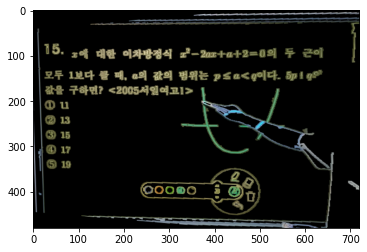

In [9]:
# Extract location of good matches
points1 = np.zeros((4, 2), dtype=np.float32)
points2 = np.zeros((4, 2), dtype=np.float32)

points1= np.array([[25.,700], [25, 357], [455, 357],[240, 15],[455,700],[455,15] ])
points1[:,[0,1]] = points1[:,[1,0]]
points2 = np.array([[30.,650], [25, 425], [460, 425],[240, 125],[440,640], [480, 110]])
points2[:,[0,1]] = points2[:,[1,0]]

# Find homography

H, mask = cv2.findHomography(points2, points1, 0)

print(H)
height, width, channels = im.shape


for i in range(480):
    for j in range(720):
        if dst[i,j]!=255:
            im[i,j]=0

im1Reg = cv2.warpPerspective(im, H, (width, height))


plt.imshow(im1Reg)

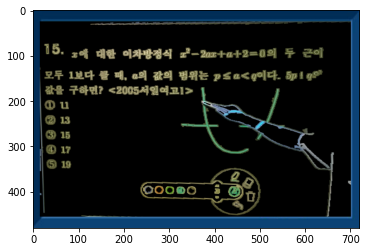

In [10]:
res = copy.deepcopy(im_bg)
for i in range(25,455):
    for j in range(15,700):
        if im1Reg[i,j].sum(0) != 0:
            res[i,j] = im1Reg[i,j]
        else:
            res[i,j] = [0,0,0]
plt.imshow(res)

In [11]:
#registration
f = os.listdir("data/imgs")
flist = sorted(f)[1:]

path = "data/imgs"

im_Regs=[]
imgs=[]
edges=[]

f1=None
h=None

for idx, f in enumerate(flist):
    if f1 is None:
        f1 = os.path.join(path, f)
        
        im = cv2.imread(f1, cv2.IMREAD_COLOR)
        im=cv2.resize(im,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
        # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        continue
    
    f2 = os.path.join(path, f)

    im2 = cv2.imread(f2, cv2.IMREAD_COLOR)
    im2=cv2.resize(im2,dsize=(720,480),interpolation=cv2.INTER_LINEAR)

    h_im=alignImages(im2,im)
    
    if h is None:
        h = H
    else:
        h = H@h_im

    im2_Reg = cv2.warpPerspective(im2, h, (width, height))
    
    im_Regs.append(im2_Reg)
    imgs.append(Image.fromarray(cv2.cvtColor(im2_Reg, cv2.COLOR_BGR2RGB)))
    
#result gif

imageio.mimsave("result4.gif", imgs, fps=10)

In [12]:
edges=[]

for img in im_Regs:
    edge = cv2.Canny(img,50,150)
    edges.append(edge)
    
new_edges=[]
for idx in range(len(edges)):
    new_edge = np.median(edges[max(0, idx-10):min(idx+11, len(edges))], 0 )
    new_edges.append(new_edge)


imgs = []
for idx, img in enumerate(im_Regs):
    
    kernel = np.ones((7,7))
    kernel = kernel/len(kernel**2)
    dst = cv2.filter2D(new_edges[idx], -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성
    dst = dst>0
    dst= dst*255
    
    
    temp_img = copy.deepcopy(img)
    temp_img[dst!=255] = 0
    
    res = copy.deepcopy(im_bg)
    res[25:455, 15:700] = 0
    res[25:455, 15:700] = temp_img[25:455, 15:700] * (temp_img[25:455, 15:700].sum(2)!=0).reshape(430,685,-1)

    imgs.append(Image.fromarray(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)))

imageio.mimsave("result5.gif", imgs, fps=10)


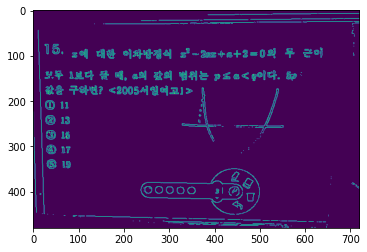

In [13]:
new_edges=[]
for idx in range(len(edges)):
    new_edge = np.median(edges[max(0, idx-5): min(idx+6, len(edges))], 0 )
    new_edges.append(new_edge)

plt.imshow(new_edges[3])

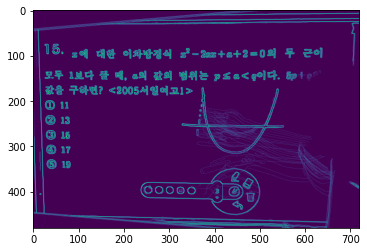

In [14]:
new_edges=[]
for idx in range(len(edges)):
    new_edge = np.mean(edges[max(0, idx-10): min(idx+11, len(edges))], 0 )
    new_edges.append(new_edge)

plt.imshow(new_edges[0])

In [ ]:
edges=[]

for img in im_Regs:
    edge = cv2.Canny(img,50,150)
    edges.append(edge)
    
new_edges=[]
for idx in range(len(edges)):
    new_edge = np.median(edges[max(0, idx-15):min(idx+16, len(edges))], 0 )
    new_edges.append(new_edge)


imgs = []
for idx, img in enumerate(im_Regs):
    
    kernel = np.ones((1,1))
    kernel = kernel/len(kernel**2)
    dst = cv2.filter2D(new_edges[idx], -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성
    dst = dst>0
    dst= dst*255
    
    temp_img =copy.deepcopy(img)
    temp_img[dst!=255] = 0
    
    res = copy.deepcopy(im_bg)
    res[25:455, 15:700] = 0
    res[25:455, 15:700] = temp_img[25:455, 15:700] * (temp_img[25:455, 15:700].sum(2)!=0).reshape(430,685,-1)
    res[25:455, 15:700] = (res[25:455, 15:700].sum(2)!=0).reshape(430,685,-1)*255

    imgs.append(Image.fromarray(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)))

imageio.mimsave("result6.gif", imgs, fps=10)


In [ ]:
plt.imshow(new_edges[0])